# Visualising value change

In [12]:
# Add table of content here

This notebook can be used to visualise how moral values have changed over time in text corpora. 

As values tend to be discussed in a latent manner (i.e. they are not mentionned explicitly), we capture moral values by means of distribution of words instead of keywords. They is done by using probabilistic topic models and creating topics (i.e. distributions of words) that refer to values. A paper discribing the approach and published in Science, Technology, & Human Values can be found here: https://doi.org/10.1177/01622439211054439

*To use this notebook yourself, click on 'Run in Google Colab':*

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tristandewildt/ValueMonitor/blob/main/ValueMonitor_Visualising_Value_Change.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tristandewildt/ValueMonitor/blob/main/ValueMonitor_Visualising_Value_Change.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

## 1. Import packages

For this section, you only need to run the code hereunder (click on the play icone). This will import packages required to analyse the corpus.

*To do: hide the code hereunder*

In [1]:
!pip install corextopic
!pip install joblib
!pip install tabulate
!git clone https://github.com/tristandewildt/ValueMonitor.git

import sys
sys.path.append('./code')

import pprint
import io
from convert_to_df import *
from make_topic_model import *
from create_visualisation import *
from import_topic_model import *
#from google.colab import files

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

'git' is not recognized as an internal or external command,
operable program or batch file.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Trist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Import and convert the corpus

In this section, we are going to import and convert the corpus.

First, you need to indicate which **corpus** you want to use for the analysis. You can use an existing corpus or import your own. In case of the latter, you can change the file path hereunder to refer to the corpus on your computer. Accepted corpus formats are *csv*, *xlsx*, *json*, *ris*, and Pandas dataframes saved as Pickle files (*pandas_df*). Indicate which file format you use at **file_format**.

*To do: check if ris is working*

In [2]:
corpus = open(".\data/scopus_1.csv", "rb")

file_format = "csv" # "csv", "xlsx", "json", "pandas_df"

'''--------------------------------------------------------------------------''' 

df = import_file_and_show_columns(corpus, file_format)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Authors                    1142 non-null   object 
 1   Author(s) ID               1142 non-null   object 
 2   Title                      1142 non-null   object 
 3   Year                       1142 non-null   int64  
 4   Source title               1142 non-null   object 
 5   Volume                     1043 non-null   object 
 6   Issue                      602 non-null    object 
 7   Art. No.                   388 non-null    object 
 8   Page start                 780 non-null    object 
 9   Page end                   771 non-null    object 
 10  Page count                 3 non-null      float64
 11  Cited by                   961 non-null    float64
 12  DOI                        1142 non-null   object 
 13  Link                       1142 non-null   objec

Next, you need to specify which columns need to be used as text (**columns_as_text**). The algorithm is going to go through this text in in order to capture values. You can use multiple columns.

You also need to specify which columns need to be used as date to analyse values over time (**column_as_date**).

After you run the code, the corpus will be prepared. This might take a bit of time depending on the size of your corpus.

In [3]:
columns_as_text = ["Source title", "Abstract", "Author Keywords"]
column_as_date = ["Year"]

list_columns = [columns_as_text, column_as_date]

'''--------------------------------------------------------------------------''' 

df = prepare_df(df, list_columns)

STEP FINISHED


In [4]:
df

,Text,Date
0,energy decarbonisation residential heat integr...,2022-03-09
1,resources conservation life cycle assessment l...,2022-03-09
2,journal cultural heritage classical music venu...,2021-03-09
3,journal choice proven effectiveness seatbelt u...,2021-03-09
4,futures physical internet pi novel comprehensi...,2021-03-09
...,...,...
1137,transportation planning technology many decisi...,2003-03-09
1138,journal hydroinformatics economic growth new y...,2003-03-09
1139,impact assessment project appraisal decision t...,2003-03-09
1140,telematics informatics policy makers captains ...,2002-03-09


## 4. Creating or importing a topic model

In this step we can either create a new topic model (4.1) or importing an existing one (4.2).

### 4.1. Creating a topic model

In this step, we create the topic model in which some of the topics refer to values. The creation of topics that reflect values is done by means of so-called 'anchor' words.

#### 4.1.1 Finding the most appropriate number of topics

The first step when creating a topic model is to identify the number of topics that the model should be composed of. Ideally, this number of topics should be the same as the actual number of topics that a person would identify if he/she would go through the documents manually. If the number of topics set for the model is too low, it could be that some topics that a person would consider to be the same will ultimatly appear in the same topic in the model. Inversely if the number of topics set for the model is too high.

To find the most adequate number of topics, the topic modelling package Corex has created a measure called 'Total correlation'. The higher this value, the better the topic model fits the actual number of topics in the documents.

To find the most adequate number of topics, topic models with different number of topics will be tested. To do so, set hereunder the smallest (**min_number_of_topics**) and largest (**max_number_of_topics**) number of topics that you would like to test. Often, the number of topics is lower than 500.

Finding the most adequate number of topics can be a time consuming step. This is because the program will have to create a topic model for every number of topics tested. For this reason you might want to take only a sample of documents from the full dataset to find the program find the most adequate number of topic. Setting '**number_of_documents_in_analysis**' to 1000 is probably a reasonable choice.

Working on model with 5 topics...
Working on model with 6 topics...
Working on model with 7 topics...
Working on model with 8 topics...
Working on model with 10 topics...


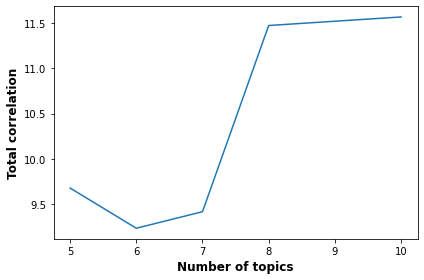

In [5]:
# Look at ExecuteTime for this

min_number_of_topics = 5
max_number_of_topics = 10
number_of_documents_in_analysis = 500

'''--------------------------------------------------------------------------''' 

best_number_of_topics = find_best_number_of_topics(df, number_of_documents_in_analysis, min_number_of_topics, max_number_of_topics)

#### 4.1.2. Creating a topic model (in which some of the topics refer to values)

Now that we have found the most adequate amount of topics for the model, we can start creating a topic model in which some of the topics refer to values. To do so, we need to identify for each value a set of words that relates to it. These are the 'anchor' words

Create a list of anchor words for each value that you want to investigate. Put words that you have identified for the first value in **Value 1**, for the second value in **Value 2**, etc. Make sure all words are surrounded by quotation marks. In the code herunder, you may replace "Value 1", "Value 2"... hereunder by the names of the values (e.g. "Safety"). This will ensure that the names of the values will appear in the figures that you will create later in the notebook. Run the code.

After some time, a list of topics will appear. Words that you see at each topic are the most prominent words of theses topics. This gives you an indication of what this topic is actually about.

The first topics are those related to values that you are building. The first time, you will probably not be entirely satisfied by the quality of the topics refering to values. This can be due to two things. (1) First, it could be that these topics contain words that you believe do not relate to the value. Hence, the topic created is about the value, but also other irrelevant aspects. (2) Second, it could be that other topics also contain words that relate to the values for which you are trying to make topics. Hence, the topic that you created only represents one aspect of the value and other aspects of the value are now yet in this topic.

For (1), write down the words that are unrelated to values in the list **list_rejected_words**. This will so to say 'pull out' the words from the topics related to values. You also use the code in 4.2.1 to inspect which documents have been assigned to the topics you are creating. This gives an indication whether the topic that you have created only contain documents that address this value.

For (2), you can use the code in 4.2.2. This code will help you to find in which other topics these aspects of the value are found. This might help you to identify additional anchor words that need to be added for each value. Put these additional anchors words in the code hereunder. This will so to say 'push' these aspects of values into the topics related to values. Then run the code again. 

Typically, the process of pulling and pushing aspects of topics to ensure that they relate better to how a value is understood needs to be done several times. This process is also a learning moment for the modellers to learn about what a value actually entails, and how this value is actually being discussed by authors.

*(Also explain that sometimes the topics does not appear if it doesn't find sufficient documents)*

In [6]:
best_number_of_topics = 200

number_of_words_per_topic_to_show = 10
number_of_words_per_topic = 20

dict_anchor_words = {
"Safety" : ["safety", "accident"],
"Security" : ["security", "secure", "malicious", "proliferation", "cybersecurity", "cyber", "sabotage", "antisabotage", "terrorism", "theft"],
"Sustainability" : ["sustainability", "sustainable", "renewable", "durability", "durable"],        
"Economic viability" : ["economic viability", "economic", "economic potential", "costs", "cost effective"],
"Intergenerational justice" : ["intergenerational justice", "intergenerational equity", "intergenerational ethics", "intergenerational equality", "intergenerational relations", "justice", "intergenerational", "future generations", "present generations", "past generations"],
}

list_anchor_words_other_topics = [
    
]

list_rejected_words = []

'''--------------------------------------------------------------------------''' 

model_and_vectorized_data = make_anchored_topic_model(df, best_number_of_topics, min(number_of_documents_in_analysis, len(df)), dict_anchor_words, list_anchor_words_other_topics, list_rejected_words)
topics = report_topics(model_and_vectorized_data[0], dict_anchor_words,number_of_words_per_topic)
df_with_topics = create_df_with_topics(df, model_and_vectorized_data[0], model_and_vectorized_data[1], best_number_of_topics)

Topic #0 (Safety): safety, accident, prevention, risk, accidents, chemical, reliability, risk assessment, environmental protection, industries, protection, assessment, process, traffic, planning, measures, management, bayesian, major, loss
Topic #1 (Security): security, long term, term, long, attack, attacks, plant, short, industrial, plants, infrastructures, internet, step, risks, alternative, structure, port, self, systematic, challenge
Topic #2 (Sustainability): sustainability, sustainable, renewable, energy, authors, renewable energy, transition, electricity, energy transition, carbon, mdpi, authors mdpi, basel, mdpi basel, basel switzerland, energy system, energy systems, energies, sustainability switzerland, generation
Topic #3 (Economic viability): economic, costs, francis group, taylor francis, francis, limited trading, trading taylor, informa uk, uk limited, informa, taylor, uk, author informa, trading, group, limited, cost, international journal, journal production, potential

##### 4.1.2.1. Verification of topics related to values


The code in this section can be used to verify that the documents attributed to a topic are indeed addressing the value in which we are interested. Set the topic number of the topic you want to evaluate at **topic_to_evaluate** and the number of randomly taken documents at **random_number_documents_to_return**.

In [24]:
topic_to_evaluate = "Safety"
random_number_documents_to_return = 5

'''--------------------------------------------------------------------------'''

print_sample_documents_related_to_topic(df_with_topics, dict_anchor_words, topic_to_evaluate, random_number_documents_to_return)

,Random 5 documents in topic Safety.
260,safety science collision risk assessment essential collision avoidance core various collision alert avoidance systems main task systems alarms evasive actions alarms conflict collision free solution collision risk measures independent conflict resolution collision alert collision avoidable article improved time collision risk tcr measure new measure measurement tcr dangerous level ships difficulty collisions traditional measures g collision risk index cri tcr changes risk identical cri tcr measure reasonable tool collision risk entire traffic influence maneuverability improvement collision risk results article conclusions collision risk ships ignorance ship maneuverability results underestimation collision risk author s collision alert system collision avoidance system collision risk velocity obstacle gvo margin
781,journal intelligent transportation systems technology planning operations paper potential effects automated driving relevant policy society findings literature effects areas future research structure review ripple effect concept implications automated vehicles different stages order traffic travel cost travel choices second order vehicle ownership location choices land use transport infrastructure third order energy consumption air pollution safety social equity economy public health review first order impacts road capacity fuel efficiency emissions accidents risk beneficial magnitude benefits level automation cooperation penetration rate systems synergistic effects vehicle automation sharing electrification benefits studies vehicles additional travel demand vehicle trips potential land use changes estimations excessive travel demand other third order benefits safety economy public health social equity unclear balance short term benefits long term impacts vehicle automation open question dimitris milakis bart van arem bert vanwee license taylor francis third order impacts first policy societal implications effect second
899,ocean engineering ais automatic identification system data valuable input parameters ship traffic simulation models maritime risk analysis prevention accidents article detailed comparisons ais data analysis dutch case chinese case analysis waterways waterway simulations differences narrow waterway netherlands port rotterdam wide china wide waterway yangtze river su bridge statistical distributions lateral position speed heading interval times different types sizes ships distributions different characteristics ship behaviors ltd rights data analysis maritime risk analysis ship traffic simulation
47,journal marine science engineering long time development maritime communication low data rate high latency high cost current communication systems upgrade new generation mobile communication technologies attention shore broadband mobile communication network high latency high reliability maritime industries paper solution means ship s2i ship s2s wireless communication networks offshore region s2i s2s channels ghz band channel measurements realistic environments channel characteristics power delay profile delay spread propagation path loss view difference marine terrestrial communications influencing factors offshore water effective reflection divergence water surface diffraction loss earth curvature power coverage range channel capacity s2i s2s wireless communications communication performance channel measurement characterization analysis research results reference construction maritime communication networks authors mdpi basel switzerland channel measurement maritime safety performance evaluation shore maritime communications
26,sustainability switzerland socio technical systems systems thinking systemic perspective clear mental models behaviours achievements socio technical systems case individuals systems such elements socio technical systems individual behaviours individual perceptions mental models individual behaviours desired outcomes system team organisa

Here you can also look for specific keywords, for example if you are unsure if one anchor word is responsible for pulling aspects that are not related to the value in the topic. Put these keywords in **list_of_words**.

In [25]:
topic_to_evaluate = "Safety"
list_of_words = ["safe"]
random_number_documents_to_return = 10

'''--------------------------------------------------------------------------'''

print_sample_documents_related_to_topic_with_keywords(df_with_topics, dict_anchor_words, list_of_words, topic_to_evaluate, random_number_documents_to_return)

,Random 10 documents in topic Safety with keywords 'safe.
697,iatss research speed speed variation key issues understanding traffic accidents substantial amount research interaction mean speed change mean paper minute continuous monitoring data mean speed expressway japan dimensional additive poisson model mean speeds changes mean speeds vehicle kilometer traffic accident rates probability accident speed reduces km h area high accident probability average speed increases km h addition accident rates sunny weather cloudy international association traffic safety sciences changes mean speeds vehicle kilometer traffic accident rates dimensional additive poisson model
226,transportation research interdisciplinary tram sustainable mode transport tram tracks vulnerable road users such pedestrians cyclists mixed environment accidents trams vrus rare severe same time previous studies tram driving complex task subjective notions traffic safety connected behavior tram drivers important order challenges drivers stated preference experiment tram drivers athens safety stress different scenarios point likert scale scenarios tram drivers static images safety model alignment type such exclusive semi exclusive existence type pedestrian crossing volume vrus influence tram drivers safety stress arrival delay load passengers familiarity important factor stress significant correlation safety stress explanation experienced tram drivers ready section unsafe familiar familiarity drivers confidence driving stress author s stress safety preference tram driving
219,sensors representation discrimination various traffic states essential role traffic accidents congestion foundation traffic state prediction representation traffic state road congestion layer traffic state unblocked representation congestion layer difficult road traffic state indicators layers road congestion road safety road stability k traffic state clustering results new type representation traffic state result traffic states classes level road congestion safety stability traffic states results class multi layer perceptron mlp different traffic states receiver characteristic roc curve superiority classification results visual display real time traffic state city s central area authors mdpi basel switzerland k multi layer perceptron mlp road safety traffic accidents traffic congestion traffic flow traffic state
120,journal production terrorist attack abqaiq oil plant saudi arabia september global attention significant role safety security sustainable oil gas supply chain vulnerability supply infrastructures intentional unintentional damages different other oil gas supply oil gas pipelines vulnerable accidental natural intentional threats due widespread distribution systematic thorough review safety security oil gas pipelines bibliometric analysis total publications safety security oil natural gas pipelines database web science publications bibliometric software vosviewer temporal regional distribution publications productive institutions productive authors cooperation networks institutions authors evolution research topics research methods keywords bibliographic analysis main research topics research methods insight research evolutions trends assessment leakage corrosion main topics qra fuzzy theory bayesian network research methods further sustainability oil gas pipelines study future research needs such pipeline security environmental sustainability pipeline system resilience results research risk assessment bayesian network consequence analysis cfd future research guidelines pipeline security resilience environmental impacts pipelines ltd bibliometric analysis oil gas pipelines research evolution safety security sustainable transportation
1043,irep symposium bulk power system dynamics viii irep2010 paper dynamic stability control design modern electric energy systems many mw scale generators various types distribution side electric systems paper small signal frequency stability distributi

##### 4.1.2.2. Verification of other topics which might contain aspects of a value

To verify if other topics contain aspects of the values in which we are interested, we can try to evaluate if there are any documents that contain words related to a topic but were not assigned to the topic. Set the topic number corresponding to the value at **topic_to_evaluate**, and words that relate to the value in **list_of_words**. Running the code hereunder will show you to which topics documents mentionning these keywords were found.

In [26]:
topic_to_evaluate = "Safety"
list_of_words = ["safe"]
number_of_words_per_topic_to_show = 10

'''--------------------------------------------------------------------------''' 

find_documents_related_to_the_value_that_are_not_yet_in_the_topics(df_with_topics, model_and_vectorized_data, dict_anchor_words, list_of_words, topic_to_evaluate, number_of_words_per_topic_to_show)

13 documents found that contains words in the list and have not been attributed to the topic of interest.


,Topics,Number of documents found in each topic with keywords 'safe' which have not been assigned to topic Safety.
7,"Topic #7: simulation, ethics, study, multi, areas, performance, engineering ethics, scenarios, moral, due",11.0
9,"Topic #9: case, case study, approach, approaches, practical, theoretical, governance, case studies, management, design",8.0
8,"Topic #8: model, transport, transportation, choice, results, transportation research, behaviour, research part, probability, road",6.0
1,"Topic #1 (Security): security, lecture, notes, artificial intelligence, lecture notes, artificial, intelligence, intelligence lecture, notes artificial, science subseries",3.0
5,"Topic #5: research, survey, system, findings, travel, preferences, literature, implications, value, mobility",3.0
2,"Topic #2 (Sustainability): sustainability, sustainable, renewable, energy, renewable energy, mdpi, basel, mdpi basel, authors mdpi, basel switzerland",2.0
6,"Topic #6: decision, makers, decision making, making, policy, policy makers, decision makers, wiley, bwm, multi criteria",2.0
3,"Topic #3 (Economic viability): economic, costs, climate, long term, term, climate change, long, cost, environmental, cycle",1.0
4,"Topic #4 (Intergenerational justice): taylor, taylor francis, francis, francis group, uk limited, informa, informa uk, trading taylor, limited trading, uk",1.0


With the code hereunder, you can inspect which documents have been attributed to each of the topics above. This might show you which anchor words you need to add to the initial list.

In [28]:
topic_in_which_some_keywords_are_found = 5
random_number_documents_to_return = 5

'''--------------------------------------------------------------------------'''

print_documents_related_to_the_value_that_are_not_yet_in_the_topics(df_with_topics, dict_anchor_words, list_of_words, topic_to_evaluate, topic_in_which_some_keywords_are_found, random_number_documents_to_return)

,Random 5 documents in topic 5 with keywords 'safe' that have not been assigned to topic Safety.
563,qualitative research journal purpose paper impact chronic illness couple s life experiences period years assumptions public health discourse light couple s attempts love health care relationship design methodology approach couple first authors glass dialogic encounter co constructed auto ethnography study raw narrative reflection reflexive part third author couple s experiences sociocultural way theories ethical care light ethical care aspects couple s balancing love health care findings study couple adversity control love relationship thanks acknowledgement importance mutual caring research limitations current public health discourse couple s private love relationship pressure blind eye difficulties contemporary self management couple feels government interloper private relationship tension friction anxiety burden illness insecure unsafe originality value novel method study rare deep insight emerald publishing care ethics chronic illness love meaningful life mutual caring
1055,procedia engineering present study concerns practice test extent contra flow laning dutch tegenverkeer netherlands participating car drivers laning solution capacity problem case lanes roads large areas lanes bornholmstraat entry exit street euroborg soccer stadium groningen outward bound direction fc groningen soccer coincidental participants short questionnaire few questions behavior opinions feelings evacuation response rate bonus questionnaire chance vip tickets fc groningen useful respondents reversed lanes situation test setup safe understandable right lane destination safe capacity gains extra traffic lane outward direction conclusion laning dutch evacuation plans recommendations purpose contraflow evacuation netherlands tegenverkeer traffic
1031,human reproduction background high quality healthcare effective safe patient important patient centredness relation effectiveness fertility care study importance patient centredness relative rates patients physicians methods discrete choice experiment dce participants hypothetical fertility clinics attributes travel time pregnancy rate effectiveness attitude information treatment continuity physicians latter represent patient centredness total patients physicians dutch belgian fertility clinics dce attributes relative importance multinomial logistic regression patients actual choice behaviour results total patients physicians participated pregnancy rates important physicians patients value centredness p willing pregnancy rate patient centredness physicians example patients pregnancy rates times important interested physicians whereas physicians times important p willingness pregnancy rate attitude patients physicians lack patient centredness cited medical reason fertility clinics conclusions patients physicians considerable value pregnancy rates undervalue importance patient centredness patients clinics quality services aware substantial importance patients centredness author discrete choice experiment fertility care patient preferences patient centredness pregnancy rates


## 5. Visualising values over time

### 5.1. Frequency of values over time

The visualisation hereunder shows the percentage of documents that have addressed each value over time. This provides an indication of how the importance of values has changed.

Set hereunder the time step you want to use: "D" = days, "M" = months, "Y" is years

['Safety', 'Security', 'Sustainability', 'Economic viability', 'Intergenerational justice']


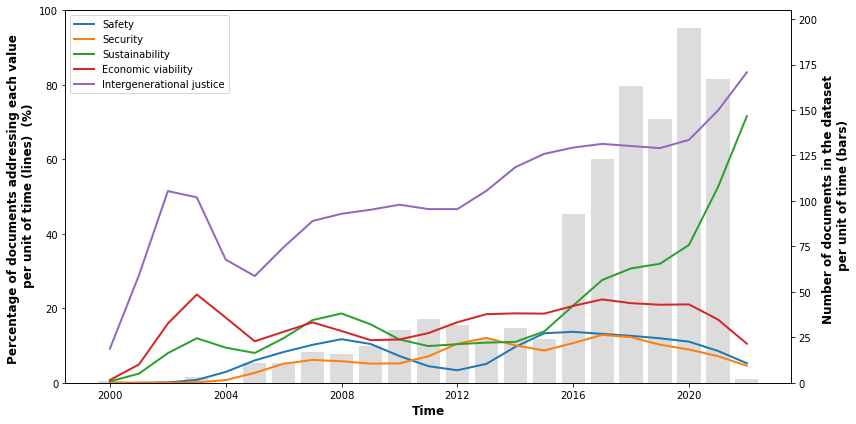

<Figure size 8000x5600 with 0 Axes>

In [8]:
resampling = "Y" # "D", "M", "Y"
smoothing = 0.5 # The bigger the value, the smoother it is
max_value_y = 100 # this is to set the max of the y axis

'''--------------------------------------------------------------------------''' 

values_to_include_in_visualisation = 0
create_vis_values_over_time(df_with_topics, dict_anchor_words, resampling, values_to_include_in_visualisation, smoothing, max_value_y)


### 5.2. Co-existence of two values

You might want to evaluate if two values have been frequently mentioned together in one document. This might potentially indicate a conflict between two values.

Put the number of the potentially co-existing values at values_selected.


No handles with labels found to put in legend.


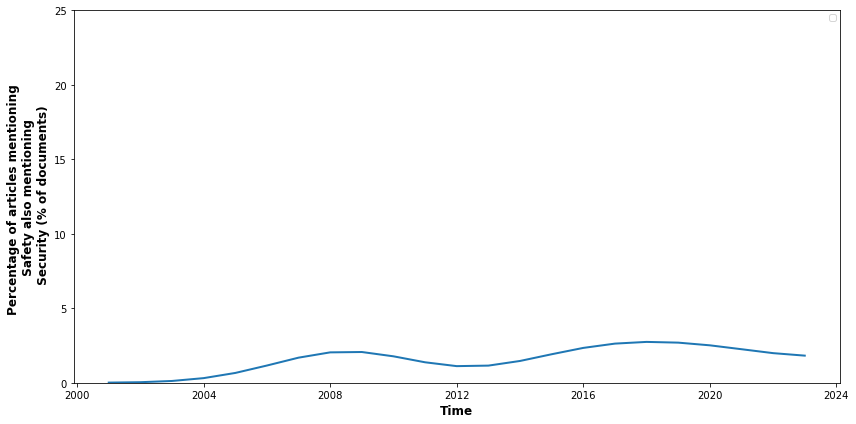

<Figure size 8000x5600 with 0 Axes>

In [9]:
values_selected = ['Safety', 'Security']
smoothing = 1 # The bigger the value, the smoother it is
max_value_y = 25 # this is to set the max of the y axis

'''--------------------------------------------------------------------------'''

coexistence_values(df_with_topics, dict_anchor_words, resampling, values_selected, smoothing, max_value_y)

### 5.3. Word appearance in documents

Next to the importance of values over time, it can be interesting to evaluate which words have most frequently been used by authors to refer to these values. "Word appearance based on most frequent words" shows the evolution of word usage for the x most importance words in a topic. "Word appearance based on own words" allows you to do the same analysis based on your own list of words.

#### Word appearance based on most frequent words

Enter which topic you want to evaluate at **topic_to_evaluate**. Enter the x most frequent words in the topic you want to evaluate at **number_of_words**.

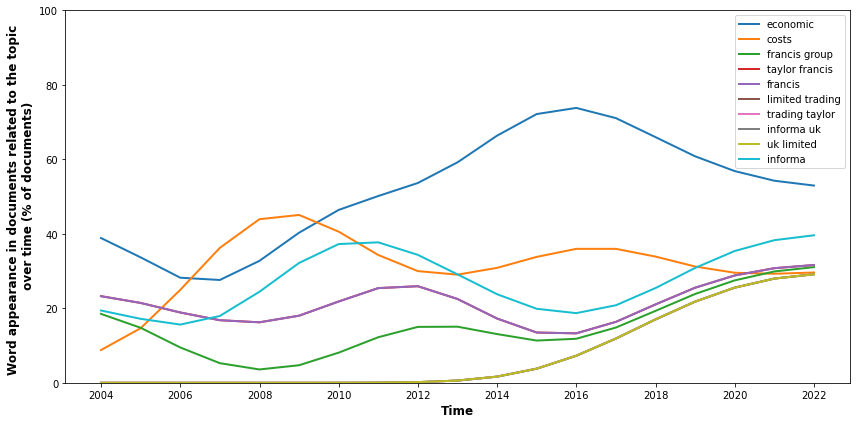

<Figure size 8000x5600 with 0 Axes>

In [10]:
topic_to_evaluate = 3
number_of_words = 10
smoothing = 1 # The bigger the value, the smoother it is
max_value_y = 100 # this is to set the max of the y axis

'''--------------------------------------------------------------------------''' 

inspect_words_over_time_based_on_most_frequent_words(df_with_topics, dict_anchor_words, model_and_vectorized_data, topic_to_evaluate, number_of_words, resampling, smoothing, max_value_y)

#### Word appearance based on own words

Enter which topic you want to evaluate at **topic_to_evaluate**. Enter the list of words you are interested in at **list_words**.

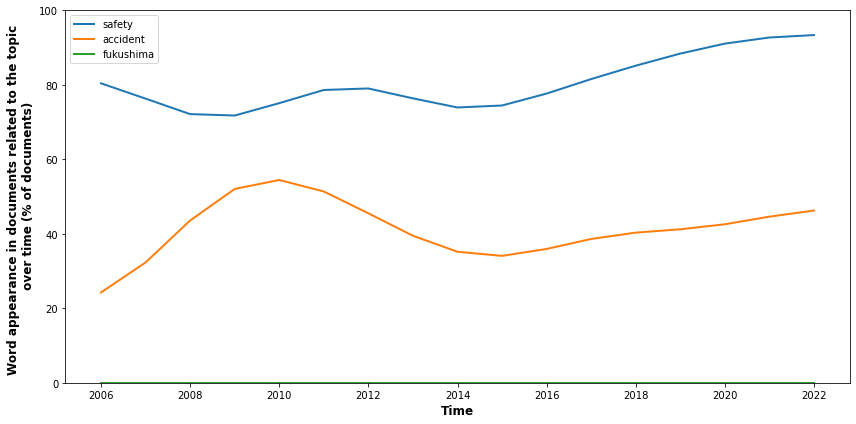

<Figure size 8000x5600 with 0 Axes>

In [11]:
topic_to_evaluate = 0
list_words = ["safety", "accident", "fukushima"]
smoothing = 1 # The bigger the value, the smoother it is
max_value_y = 100 # this is to set the max of the y axis

'''--------------------------------------------------------------------------''' 

inspect_words_over_time_based_on_own_list(df_with_topics, dict_anchor_words, topic_to_evaluate, list_words, resampling, smoothing, max_value_y)